<a class="anchor" id="0"></a>
# <font color='red'>**Santander Customer Satisfaction**</font>

Case Study - Predicting Customer Satisfaction Level from Santander.

## Problem Statement - Identify dissatisfied customers for Santander Bank

- To identify dissatisfied customers at the beginning of the relationship with at least 70% accuracy.

In [80]:
# Python Version
from platform import python_version
print('The Python version used to this Jupyter Notebook:', python_version())

The Python version used to this Jupyter Notebook: 3.9.7


In [81]:
# To install watermark package.
# This package is used to record the others package version in this jupyter notebook.
#!pip install -q -U watermark

In [82]:
# Imports

#!pip install -q -U xgboost

import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.feature_selection import VarianceThreshold
from random import randint
from scipy.sparse import csr_matrix
from xgboost.sklearn import XGBClassifier
from sklearn import (metrics, linear_model, preprocessing)
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.preprocessing import StandardScaler 	# we will use this to standardize the data
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold 	# the cross validation method we are going to use
#from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from math import log
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,roc_curve,roc_auc_score,precision_score,recall_score,accuracy_score

In [83]:
# Packages version used in this jupyter notebook
%reload_ext watermark
%watermark -a "White Web - Marcos Caio Vicentin - www.whiteweb-it.com " --iversions

Author: White Web - Marcos Caio Vicentin - www.whiteweb-it.com 

xgboost   : 1.6.1
matplotlib: 3.4.3
csv       : 1.0
json      : 2.0.9
seaborn   : 0.11.2
numpy     : 1.22.3
sys       : 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
pandas    : 1.4.2
sklearn   : 0.24.2



In [84]:
# import the Santander customer satisfaction dataset from Kaggle

train = pd.read_csv('C:/Caio/Estudos/ML/BigData_Python_Spark/Projetos/Santander_train.csv')

## Exploratory data analysis

- To understand features and try to analyse some feature.

In [86]:
# Visualize train date
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [88]:
## remove IDS
ID = train['ID']
train.drop('ID', axis=1, inplace=True)

KeyError: 'ID'

In [89]:
# Shape
train.shape

(76020, 370)

In [90]:
train.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [91]:
# Check if there is NA values
train.isna().sum()

var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
imp_op_var39_comer_ult3    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 370, dtype: int64

In [92]:
# Check if there is duplicated values
train.duplicated().sum()

4807

In [93]:
# Remove duplicated values
train.drop_duplicates(keep = False, inplace = True)

### **Using variance threshold from sklearn**

- Variance threshold from sklearn removes all features which variance doesn’t meet some threshold. I.e., features that have the same value in all samples.

In [94]:
# using sklearn variancethreshold to find constant features

sel = VarianceThreshold(threshold=0)
sel.fit(train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [95]:
# get_support is a vector that indicates which features are retained
# we get the number of features that are not constant
sum(sel.get_support())

336

In [96]:
# print the constant features
print(
    len([
        x for x in train.columns
        if x not in train.columns[sel.get_support()]
    ]))

[x for x in train.columns if x not in train.columns[sel.get_support()]]

34


['ind_var2_0',
 'ind_var2',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3']

- We can see that there are 34 columns / variables that are constant. This means that 34 variables show the same value, just one value, for all the observations of the training set.

In [97]:
# We drop the variables with t-he same values
drop = [x for x in train.columns if x not in train.columns[sel.get_support()]]
train_new = train
train_new.drop(labels=drop, axis=1, inplace = True)

In [98]:
# check the new shape
train_new.shape

(70229, 336)

From the above Data few observations as below :
1. We can see that var3 feature column having unknown value -999999. We need to change this value.

In [99]:
train_new.var3.mean()

-1435.3780916715316

In [100]:
train_new.var3.std()

37896.03801056428

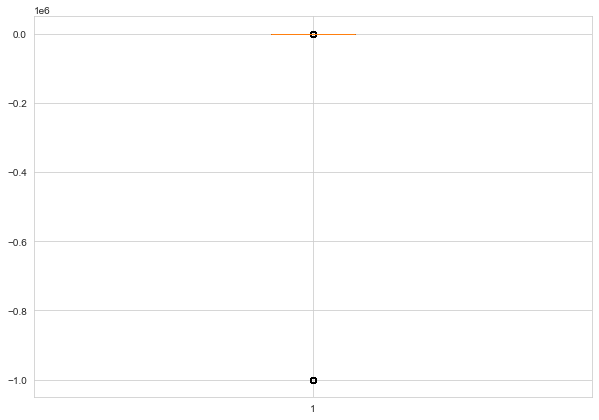

In [101]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(train_new.var3)

# show plot
plt.show()

In [102]:
train_new[train_new.var3 < 0]

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
782,-999999,33,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
3361,-999999,36,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
4103,-999999,27,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
4422,-999999,45,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
7053,-999999,44,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74796,-999999,25,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
74846,-999999,25,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
75012,-999999,39,0.0,451.83,451.83,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
75783,-999999,38,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [103]:
# change for a default value
train_new['var3'].replace(-999999,2, inplace=True)

In [105]:
# remove identical features
remove = []
c = train_new.columns
for i in range(len(c)-1):
    v = train_new[c[i]].values
    for j in range(i+1, len(c)):
    	if np.array_equal(v, train_new[c[j]].values):
    		print (str(c[i]) + " and " + str(c[j]) + " are equal")
    		remove.append(c[j])


train_new.drop(remove, axis=1, inplace=True)

In [106]:
# check the new shape
train_new.shape

(70229, 307)

<AxesSubplot:xlabel='TARGET', ylabel='count'>

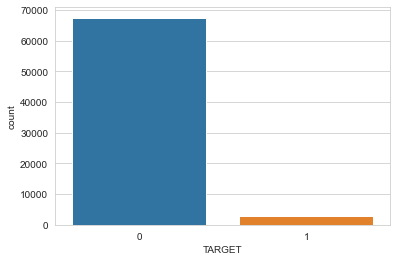

In [107]:
# check the balance between target values
sns.countplot(x = train_new["TARGET"])

<AxesSubplot:xlabel='TARGET', ylabel='count'>

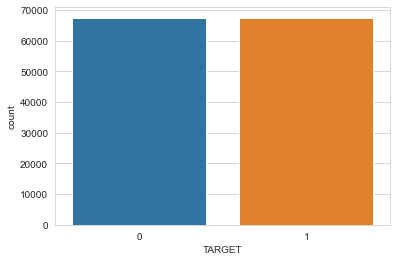

In [108]:
# Separate majority and minority classes
train_tg_0 = train_new[train_new.TARGET==0]
train_tg_1 = train_new[train_new.TARGET==1]

# Upsample minority class
train_tg_1_sampled = resample(train_tg_1,
                                 replace=True,     # sample with replacement
                                 n_samples=67476,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
train_balanced = pd.concat([train_tg_0, train_tg_1_sampled])

# Display new class counts
train_balanced.TARGET.value_counts()
sns.countplot(x = train_balanced["TARGET"])

In [109]:
# Separete Target variable
target = train_balanced.loc[:,['TARGET']].values
train_balanced.drop('TARGET', axis=1, inplace=True)

In [110]:
# Normalize the features
scaler = StandardScaler().fit(train_balanced)
standardX = scaler.transform(train_balanced)


In [113]:
# Select Principal Components - target 10 features
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(standardX)
principalDf = pd.DataFrame(data = principalComponents)

In [114]:
principalDf.shape

(134952, 10)

In [115]:
target = pd.DataFrame(target)

In [116]:
#Concat features and target to prepare train dataset
finalDf = pd.concat([principalDf, target[0]], axis = 1)

In [117]:
principalDf.shape, target.shape, finalDf.shape

((134952, 10), (134952, 1), (134952, 11))

In [118]:
# Define the test dataset size
test_size = 0.3

seed = 7

# Create test and train datasets
train_data, test_data, target_train, target_test = train_test_split(principalDf, target, test_size = test_size, random_state = seed)

In [119]:
# check the shape of training and test set
train_data.shape, test_data.shape,target_train.shape, target_test.shape

((94466, 10), (40486, 10), (94466, 1), (40486, 1))

In [120]:
# Model preparation
models = []
models.append(('LR', LogisticRegression(class_weight='balanced')))
models.append(('Bagging Classifier',BaggingClassifier()))
models.append(('KNN', KNeighborsClassifier(weights='distance')))
models.append(('RandomForest', RandomForestClassifier(class_weight='balanced')))
models.append(('DecisionTree', DecisionTreeClassifier(class_weight='balanced')))
models.append(('GradientBoosting', GradientBoostingClassifier()))
models.append(('xgb', XGBClassifier(missing=np.nan, max_depth=6,
n_estimators=350, learning_rate=0.025, nthread=4, subsample=0.95,
colsample_bytree=0.85, seed=4242)))

In [121]:
def model_comparison_plot(model_metrics):
  plt.figure(figsize = (12,4))
  sns.heatmap(model_metrics, annot=True, cmap=sns.light_palette((210, 90, 60), input="husl"),linewidth=2)
  plt.title('Metrics comparison for diff models')
  plt.show()

In [122]:
def plot_roc_curve(y_test, prob_dict):
  sns.set_style('whitegrid')
  plt.figure()
  i=0
  fig, ax = plt.subplots(4,2,figsize=(16,30))
  for key,prob in prob_dict.items():
    fpr, tpr, thresholds = metrics.roc_curve( y_test, prob,
                                                  drop_intermediate = False )
    roc_auc = metrics.roc_auc_score( y_test, prob)
    i+= 1
    plt.subplot(4,2,i)
    plt.plot( fpr, tpr, color='red',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.axis('tight')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(key)
  plt.show()

In [123]:
# function to run models
def model_analysis(title,x_train,y_train,x_test,y_test):
  df_scores=pd.DataFrame()
  pred_dict={}
  for name,model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    pred_dict[name] = y_pred
    confusion = confusion_matrix(y_test,y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = metrics.accuracy_score(y_test, y_pred)
    error = 1-accuracy
    sensitivity = TP / float(FN + TP)
    specificity = TN / (TN + FP)
    False_positive_rate = 1-specificity
    precision = TP / float(TP + FP)
    bal_acc = metrics.balanced_accuracy_score(y_test, y_pred)
    Null_accuracy = max(y_test.mean(), (1 - y_test.mean()))
    f1 = metrics.f1_score(y_test,y_pred)
    auc_score = metrics.roc_auc_score(y_test,y_pred)
    clf_score = pd.DataFrame(
        {name: [accuracy, bal_acc, Null_accuracy,precision,sensitivity,f1,error,specificity,auc_score]},
        index=['Accuracy', 'Balanced accuracy','Null_accuracy','precision','recall','f1 score','error','specificity','auc_score']
    )

    df_scores = pd.concat([df_scores, clf_score], axis=1).round(decimals=3)
  print("Roc_curve for all models")
  plot_roc_curve(y_test,pred_dict)
  print(title,end='\n\n')
  print(df_scores.to_markdown(),end='\n\n')
  model_comparison_plot(df_scores)

Roc_curve for all models


<Figure size 432x288 with 0 Axes>

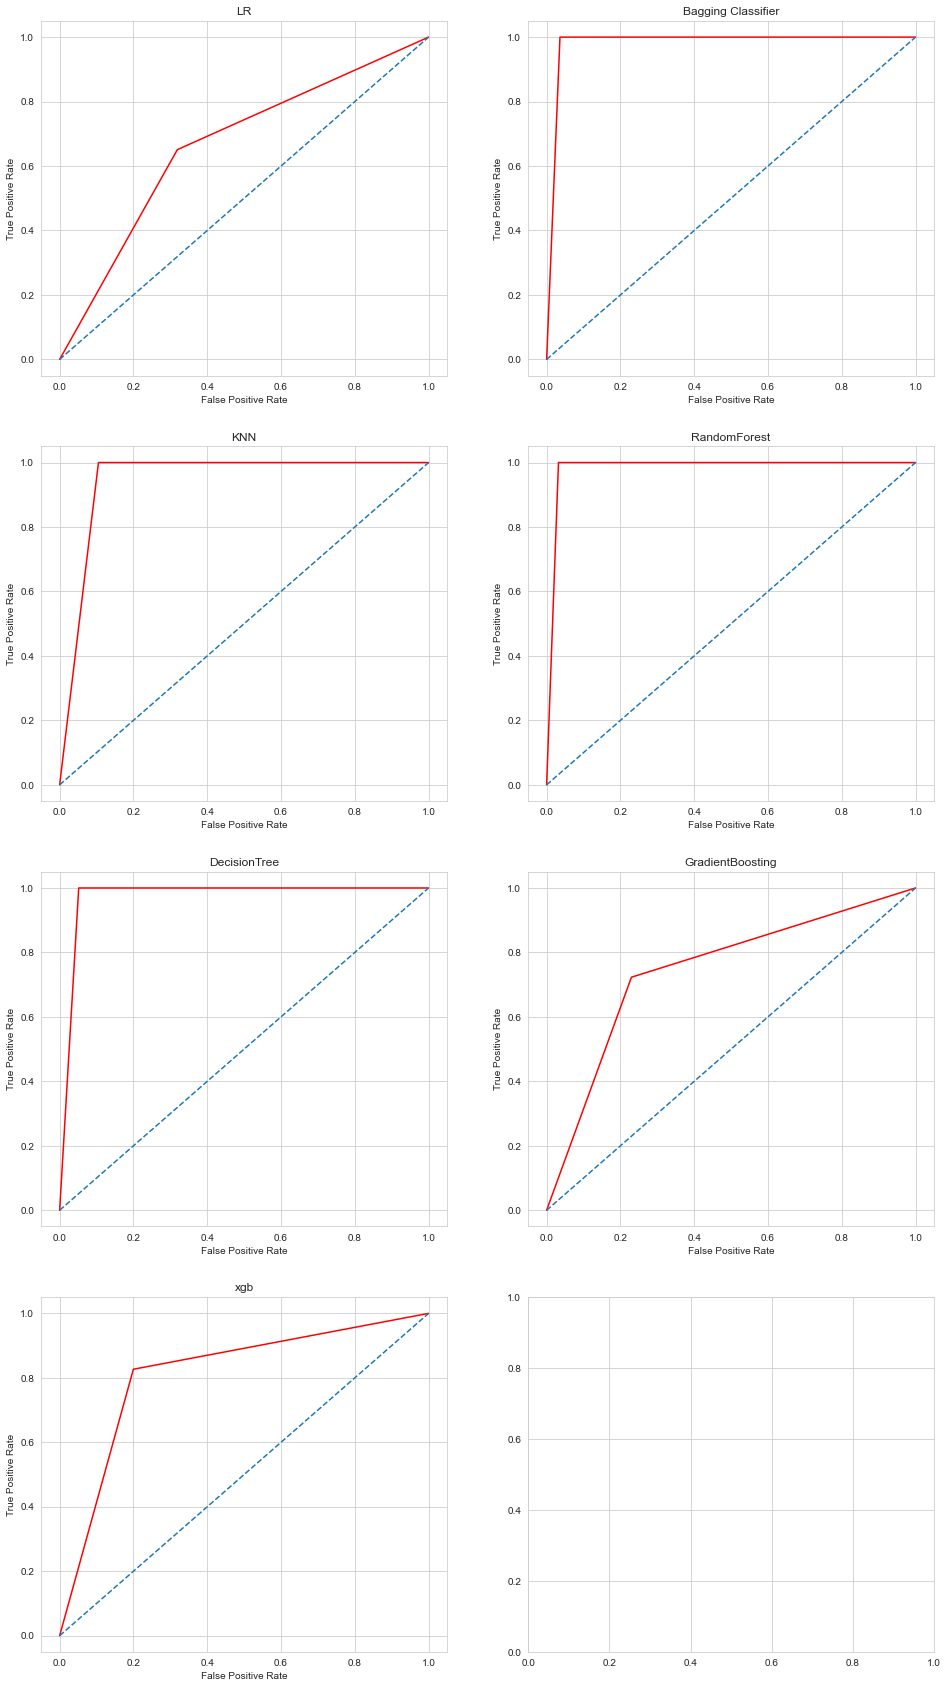

Model with normal data

|                   |    LR |   Bagging Classifier |   KNN |   RandomForest |   DecisionTree |   GradientBoosting |   xgb |
|:------------------|------:|---------------------:|------:|---------------:|---------------:|-------------------:|------:|
| Accuracy          | 0.666 |                0.982 | 0.947 |          0.984 |          0.974 |              0.747 | 0.813 |
| Balanced accuracy | 0.666 |                0.982 | 0.947 |          0.984 |          0.974 |              0.747 | 0.813 |
| Null_accuracy     | 0.5   |                0.5   | 0.5   |          0.5   |          0.5   |              0.5   | 0.5   |
| precision         | 0.671 |                0.965 | 0.905 |          0.969 |          0.951 |              0.759 | 0.805 |
| recall            | 0.651 |                1     | 1     |          1     |          1     |              0.723 | 0.827 |
| f1 score          | 0.661 |                0.982 | 0.95  |          0.984 |          0.975 |              

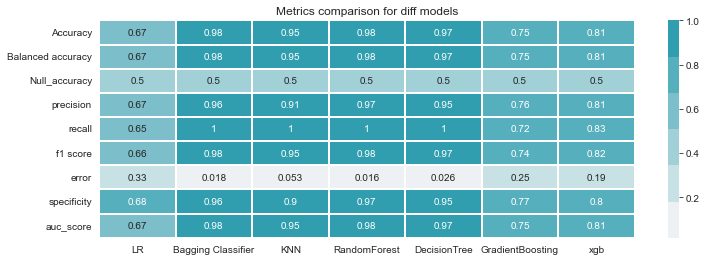

In [124]:
# run models
model_analysis("Model with normal data", train_data, target_train.values.ravel(), test_data, target_test.values.ravel())

# Predicting the probability of every customer is unhappy

In [125]:
# We selected Random Forest as the Final Model
final_model = RandomForestClassifier(class_weight = 'balanced', random_state = 7)

In [126]:
# Train the Final Model
final_model.fit(train_data, target_train.values.ravel())

RandomForestClassifier(class_weight='balanced', random_state=7)

In [127]:
# Validate the Model
y_pred = final_model.predict(test_data)

In [130]:
print(confusion_matrix(target_test,y_pred))

[[19594   639]
 [    0 20253]]


In [131]:
print('Average ROC Test:',metrics.accuracy_score(target_test, y_pred) )

Average ROC Test: 0.9842167662895815
